In [6]:
import numpy as np
import scipy as sp
import math as m
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Q1

DOF: 8
Lifetime: 473.56675752523284 ± 55.28239131380527
Chi^2: 17.500389771867532
Reduced chi^2: 2.1875487214834415
Chi^2 critical: 15.5
Fit acceptable at 5% level of significance: False


C:\Users\pksam\AppData\Local\Temp\ipykernel_17476\186673878.py:6: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * t)


Text(0, 0.5, 'ln(Count)')

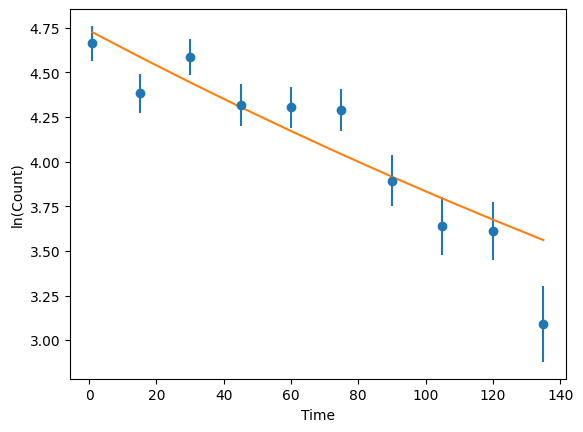

In [31]:
time=np.array([1, 15, 30, 45, 60, 75, 90, 105, 120, 135])
counts=np.array([106, 80, 98, 75, 74, 73, 49, 38, 37, 22])
uncertainity = np.array([10, 9, 10, 9, 8, 8, 7, 6, 6, 5])

def f(t, a, b):
	return a * np.exp(-b * t)

ln_counts = np.log(counts)
sigma_ln_counts = 1 / np.sqrt(counts)

s , v = curve_fit(f, time, ln_counts, sigma=sigma_ln_counts, absolute_sigma=True)


lifetime = 1 / s[1]
er_lifetime = np.sqrt(np.diag(v))[1] / s[1]**2

chi_square = np.sum(((ln_counts - f(time, *s)) / sigma_ln_counts) ** 2)
reduced_chi_square = chi_square / (len(time) - len(s))

degrees_of_freedom = len(time) - len(s)

chi_square_critical = 15.5 #calculated
fit_acceptable = chi_square <= chi_square_critical

print('DOF:',degrees_of_freedom)
print(f"Lifetime: {lifetime} ± {er_lifetime}")
print('Chi^2:',chi_square)
print(f"Reduced chi^2: {reduced_chi_square}")
print(f"Chi^2 critical: {chi_square_critical}")
print(f"Fit acceptable at 5% level of significance: {fit_acceptable}")

plt.errorbar(time, ln_counts, yerr=sigma_ln_counts, fmt='o')
s = np.array(s)
fit = f(time, *s)
fit = np.array(fit)
plt.plot(time, fit)
plt.xlabel('Time')
plt.ylabel('ln(Count)')



## Q2

In [19]:
def fixed_point_single(g: float,x0: float,tol: float):

    x1=g(x0)
    step=1
    while abs(x1-x0)>tol:
        if step>250:
            print("roots aren't converging")
            break
        else:
            x0=x1
            x1=g(x0)
            step+=1
    return x1,step
p = 5.95
R = 0.0821
a = 6.254
b = 0.05422

def g1(v):
    return (a*b/p)*(1/(b*v - v*v - a))

def g2(v):
    return a*((p*v**2)/(b*p*v**2 + a*b +p*v**3))


guess=1

tol= 1e-5

sol1, step1 = fixed_point_single(g1,guess,tol)
sol2, step2 = fixed_point_single(g2,guess,tol)

print(f"The solution using g1 is V = {sol1 :.7f}, {step1} steps")
print(f"The solution using g2 is V = {sol2 :.7f}, {step2} steps")

roots aren't converging
The solution using g1 is V = -0.0091118, 3 steps
The solution using g2 is V = 2.4696544, 251 steps


## Q6

Text(0, 0.5, 'Frequency')

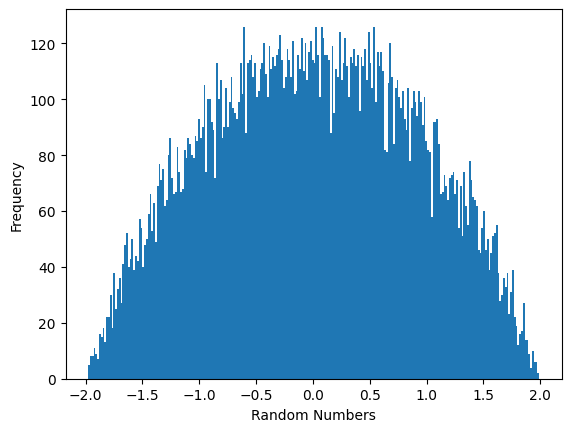

In [25]:
import random as r
a=2

def f(x):
    return 0.5*(a**2 - x**2)

def g(x):
    return (1/np.sqrt(2*np.pi))*np.exp(-0.5*(x**2))

c  = 6.814 # c is the minimum value of f(x)/g(x) in the interval [-a,a]

mu = 0
sigma = 1
rn_list = []

for i in range(25000):
    rn_x = r.gauss(mu,sigma) 
    rn_u = r.uniform(0,1)
    if rn_u < f(rn_x)/(c*g(rn_x)):
        rn_list.append(rn_x)
    else:
        continue

plt.hist(rn_list,bins = 250)
plt.xlabel("Random Numbers")
plt.ylabel("Frequency")


In [35]:
def power_method_find(A :list,x0: list,tol = 1e-6):
    A=np.array(A)
    x0=np.array(x0)
    x_copy = np.copy(x0)
    lam_0 = np.matmul(np.matmul(np.linalg.matrix_power(A,2),x0).T,np.matmul(np.linalg.matrix_power(A,1),x0))/np.matmul(np.matmul(np.linalg.matrix_power(A,1),x0).T,np.matmul(np.linalg.matrix_power(A,1),x0))
    lam_1 = np.matmul(np.matmul(np.linalg.matrix_power(A,3),x0).T,np.matmul(np.linalg.matrix_power(A,2),x0))/np.matmul(np.matmul(np.linalg.matrix_power(A,2),x0).T,np.matmul(np.linalg.matrix_power(A,2),x0))
    i=3
    while abs(lam_1-lam_0)>tol:
        lam_0 = lam_1
        lam_1 = np.matmul(np.matmul(np.linalg.matrix_power(A,i+1),x0).T,np.matmul(np.linalg.matrix_power(A,i),x0))/np.matmul(np.matmul(np.linalg.matrix_power(A,i),x0).T,np.matmul(np.linalg.matrix_power(A,i),x0))
        i+=1

    eigval = lam_1
    eigvec = np.matmul(np.linalg.matrix_power(A,i-1),x_copy)
    norm = np.linalg.norm(eigvec)
    eigvec = eigvec/norm
    return eigval,eigvec,i  

A = np.array([
    [2, -1, 0, 0, 0],
    [-1, 2, -1, 0, 0],
    [0, -1, 2, -1, 0],
    [0, 0, -1, 2, -1],
    [0, 0, 0, -1, 2]
])


guess = np.array([1,1,1,1,1])
eigval,eighvec,steps = power_method_find(np.copy(A),guess,tolerence)


print(f"The largest eigenvalue is {eigval}")
print(f"The corresponding eigenvector is:")
print(eighvec)
print(f"The number of steps taken are {steps}")
a = -1
c = -1
n = 5
b = 2




def lambda_1(k):
    return b + 2*np.sqrt(a*c)*np.cos(k*np.pi/(n+1))

def vect(k,i):
    return 2*((np.sqrt(c/a))**k)*np.sin(i*k*np.pi/(n+1))





vec_list = []

for i in range(1,n+1):
    vec_list.append(vect(1,i))




print(f"The largest eigenvalue obtained from power method is {eigval} and \n the one obtained from the formula is {lambda_1(1)}")


print("The obtained eigen vector from the given foormula is")
print(np.array(vec_list)/np.linalg.norm(vec_list))

print("Which is same as that obtained from the power method. The only difference is that the eigen vector obtained from the formula is perpendicular.")

NameError: name 'tolerence' is not defined

Expectation value of Hamiltonian:
a = 0.1: E = 2.512069824595948
a = 0.2: E = 1.2726398389427214
a = 0.3: E = 0.7965127920932045
a = 0.4: E = 0.6563167899790037
a = 0.5: E = 0.4772571088249479
a = 0.6: E = 0.40954979011978954
a = 0.7: E = 0.3446304703610908
a = 0.7999999999999999: E = 0.3161535367221886
a = 0.8999999999999999: E = 0.2734778415472201
a = 0.9999999999999999: E = 0.24678741661147466
a = 1.0999999999999999: E = 0.21959875651243743
a = 1.2: E = 0.20293371366180263
a = 1.3: E = 0.2284112665944695
a = 1.4: E = 0.19558860732675953
a = 1.5: E = 0.17009634428299988
a = 1.5999999999999999: E = 0.17660381518800733
a = 1.7: E = 0.15129513410687065
a = 1.8: E = 0.12997405429964642
a = 1.9: E = 0.1546836602677125
a = 2.0: E = 0.1513614215699461


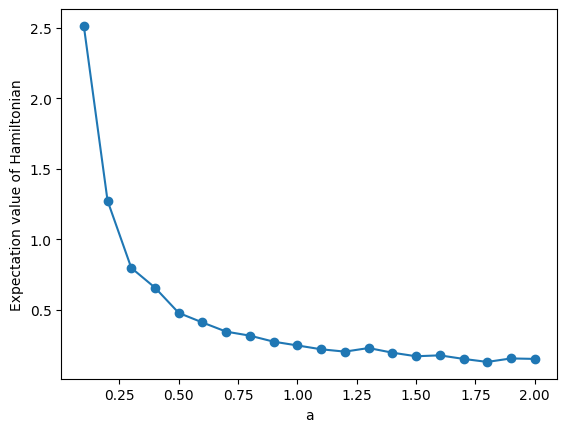

In [36]:
m = 1  # mass
omega = 1  # frequency
N = 20000  # number of Monte Carlo steps
a_values = np.linspace(0.1, 2.0, 20)  # variational parameters

# Trial wavefunction and its derivative
def psi(x, a):
	return np.exp(-a * x**2)

def psi_prime(x, a):
	return -2 * a * x * np.exp(-a * x**2)

# Hamiltonian
def H(x, a):
	kinetic = -0.5 * psi_prime(x, a) / psi(x, a)
	potential = 0.5 * m * omega**2 * x**2
	return kinetic + potential

# Monte Carlo step
def step(x, delta=1.0):
	return x + delta * (2 * np.random.rand() - 1)

# Initialize position
x = 0.0

E_a = []
# Perform Monte Carlo simulation for each variational parameter
for a in a_values:
	E_total = 0.0
	for i in range(N):
		x_new = step(x)
		if np.random.rand() < psi(x_new, a) / psi(x, a):
			x = x_new
		E_total += H(x, a)

	# Calculate expectation value of Hamiltonian
	E = E_total / N

	E_a.append(E)

	#print(f"Expectation value of Hamiltonian for a = {a}: {E}")

print('Expectation value of Hamiltonian:')
for i in range(len(a_values)):
	print(f"a = {a_values[i]}: E = {E_a[i]}")

#plot E_a vs a
plt.plot(a_values, E_a, 'o-')
plt.xlabel('a')
plt.ylabel('Expectation value of Hamiltonian')
plt.show()